# Closest n CDR3s

Find the n closest CDR3s to a given CDR3.

Given a CDR3, a sample, a distance function, and a limit "n", find the n CDR3s in the sample that are closest to the given CDR3 according to the given distance function.

If you have a specific CDR3 that is important for combatting a virus, this analysis could be useful for finding other CDR3s that may also defend against the virus.  This analysis is also useful for finding CDR3s that may have arisen from a mutation.

In [3]:
import main_n_closest_cdr3s
import cdr3_distances

main_n_closest_cdr3s.get_n_closest_cdr3s(
    # the file name of the sample you want to analyze
    file_name='cdr3.a.A_2017_2018_d_00_53535.ann',
    # the CDR3 sequence
    cdr3='cVVSAFQAGTALIf',
    # the number of closest CDR3s you want to output
    n=20,
    # the distance function you want to use on each pair of CDR3s
    dist_func=cdr3_distances.hamming,
    # the ngram 'n' to use on the CDR3 sequences before applying the distance function (defaults to 1)
    n_gram_len=1,
)


[   ('cVVSAFQAGTALIf', (0, 65674)),
    ('cVVSALQAGTALIf', (1, 841)),
    ('cVVSAFQAGTALIl', (1, 662)),
    ('cVVSTFQAGTALIf', (1, 597)),
    ('cVVSAFQAGTALVf', (1, 596)),
    ('cVVSAFQAGSALIf', (1, 511)),
    ('cVVSAFEAGTALIf', (1, 497)),
    ('cVVSAFLAGTALIf', (1, 461)),
    ('cVVGAFQAGTALIf', (1, 424)),
    ('cAVSAFQAGTALIf', (1, 417)),
    ('rVVSAFQAGTALIf', (1, 373)),
    ('cVASAFQAGTALIf', (1, 340)),
    ('cVVSAFQAGTAPIf', (1, 338)),
    ('cVVSAFQAGTALIs', (1, 320)),
    ('cVVSASQAGTALIf', (1, 319)),
    ('cVVSAFQAGAALIf', (1, 296)),
    ('cVVSAFQAGTALTf', (1, 287)),
    ('cVVSAFRAGTALIf', (1, 275)),
    ('cVVSAVQAGTALIf', (1, 262)),
    ('cVVSEFQAGTALIf', (1, 240))]


# Curve fitting CDR3 frequencies

Given a sample, we graph its CDR3 frequencies and then fit a piecewise Zipf and exponential decay curve to the points.

We report the R^2 score which indicates how good the fit is.

computation starting...


fitted params: [ 1.51040446e+01  3.05335000e+04  3.10000000e+00  2.79428556e+04
 -4.91166043e-01  1.15094300e+04]
R^2 score: 0.9980459960873619


/home/matt/work/main_piecewise_curve_fitting.py:29: RuntimeWarning: divide by zero encountered in true_divide
  lambda x: (x**-a)/zetac(a) + v_shift_left,
/home/matt/work/main_piecewise_curve_fitting.py:29: RuntimeWarning: invalid value encountered in true_divide
  lambda x: (x**-a)/zetac(a) + v_shift_left,
/opt/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


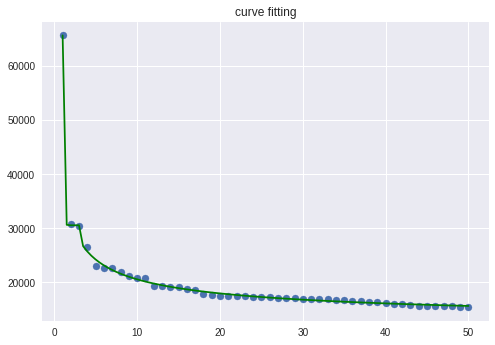



computation complete.


In [2]:
import main_piecewise_curve_fitting

print('computation starting...\n\n')
main_piecewise_curve_fitting.fit_curve(
    # file name of the sample whose frequencies you want to analyze
    file_name='cdr3.a.A_2017_2018_d_00_53535.ann',
    # the number of CDR3s you want to analyze (put None if you want them all).
    num_cdr3s=50,
    # reasonable starting guesses for the fit method
    # param 1: 's' negative exponent of (x**-s/zetac(s) + c) Zipf func
    # param 2: 'c' vertical displacement of (x**-s/zetac(s) + c) Zipf func
    # param 3: the piecewise midpoint cutoff boundary
    # param 4: 'a' multiplier in (a * x**b + c) exponential decay func
    # param 5: 'b' exponent in (a * x**b + c) exponential decay func
    # param 6: 'c' constant in (a * x**b + c) exponential decay func
    initial_param_guesses=[6.1, 1.1, 3.1, 60000.1, -1.1, 1.1],
)
print('\n\ncomputation complete.')


# Sample to Sample distance ladder

Look at the distance (amount of change) between pairs of samples.

Various distance functions can be used to compute a distance between a pair of samples.  In this analysis you can choose which distance function suits your objective.

The number immediately to the right of a sample represents the distance between that sample and the one immediately below it.  The number TWO spots to the right of the sample represents the distance between that sample and the one TWO spots below it.  And so forth.

In [ ]:
import main_sample_to_sample
import sample_distances

print('computation starting...\n\n')
main_sample_to_sample.calculate_combination(
    # distance function used to compute the distance between each pair of samples
    # valid inputs: l2 (Euclidean), lp(p) (input any integer >= 1 for p), linfty, jaccard, weighted_jaccard
    dist_func=sample_distances.lp(1),
    # list the samples you want to compare. they will be compared in the order you put them.
    file_names=[
        'cdr3.b.A_2017_2018_d_00_53535.ann',
        'cdr3.b.A_2017_2018_d_07_11143.ann',
        'cdr3.b.A_2017_2018_d_28_44887.ann',
        'cdr3.b.A_2017_2018_m_04_73516.ann',
        # 'cdr3.b.A_2019_2020_d_00_20857.ann',
    ],
    # the maximum number of columns in the distance ladder
    ladder_width=3,
)
print('\n\ncomputation complete.')


# Average sample distance

Find the average distance between pairs of samples.

Given a list of samples, find the distance between each possible sample pair, and then take the average of those numbers.  This is useful to get an idea of what a "normal" distance might be in the context of the samples you are currently looking at and the current distance function you are using.

In [ ]:
import main_average_sample_distance
import sample_distances

print('computation starting...\n\n')
main_average_sample_distance.calculate_combination(
    # distance function used to compute the distance between each pair of samples
    # valid inputs: l2 (Euclidean), lp(p) (input any integer >= 1 for p), linfty, jaccard, weighted_jaccard
    dist_func=sample_distances.linfty,
    # samples you want to compare. order does not matter.
    file_names={
        'A': ['cdr3.a.A_2017_2018_d_00_53535.ann'],
        'B': ['cdr3.a.B_2017_2018_d_00_32483.ann'],
        'C': ['cdr3.a.C_2017_2018_d_00_26898.ann'],
        # 'D': ['cdr3.a.D_2017_2018_d_00_45294.ann'],
        # 'E': ['cdr3.a.E_2017_2018_d_00_94077.ann'],
    },
)
print('\n\ncomputation complete.')


# CDR3s to Sample

Use distances between a small number of CDR3s in order to guess which sample they came from.

For example, we could have 5 people and 1 sample from each person.  We then remove a CDR3 at random from one of these samples (and to be fair, we remove the same CDR3 from all the other samples if it occurs).  We then look at the distance between this CDR3 and the remaining CDR3s in the samples, and we see which sample is closest.  We **guess** that this is the sample that the CDR3 was originally removed from.  Finally, we rerun the whole process `num_trials` times and report the percentage of guesses that were correct (the **accuracy**).

In [ ]:
import main_cdr3s_to_sample

print('computation starting...')
main_cdr3s_to_sample.calculate_combination(
    # the file names of the samples you want to guess among
    file_names={
        'A': ['cdr3.a.A_2000_2001_d_00_47407.ann'],
        'B': ['cdr3.a.B_2017_2018_d_00_32483.ann'],
        'C': ['cdr3.a.C_2017_2018_d_00_26898.ann'],
        # 'D': ['cdr3.a.D_2017_2018_d_00_45294.ann'],
        # 'E': ['cdr3.a.E_2017_2018_d_00_94077.ann'],
    },
    # the number of times to run the simulation per sample
    num_trials_per_sample=3,
    # the ngram 'n' to use on the CDR3 sequences before applying the distance function
    n_gram_len=1,
    # the distance function to use on pairs of CDR3s
    inner_dist_func_name='jaccard',
    # the aggregation function to use on cdr3 distances in order to obtain a single cdr3--sample distance
    dist_agg_func_name='min',
    # the number of CDR3s to use per guess. more CDR3s is more information and should increase accuracy, but also increase computation time
    num_cdr3s=1,
)
print('computation complete.')


# CDR3 Lifespan

Run the following cell to get a graph of cdr3 frequencies changing over time.

In [ ]:
import data_utils
import main_cdr3_lifespan

print('computation starting...')
sample = data_utils.get_cdr3_counter_from_file('s', 'cdr3.b.A_2019_2020_d_00_20857.ann')
cdr3s = [sample.get_cdr3_by_rank(r) for r in range(1, 5)] # <- top 4 cdr3 sequences occuring in cdr3.b.A_2019_2020_d_00_20857.ann
main_cdr3_lifespan.calculate_one(
    # list of cdr3 sequences you want to graph
    cdr3s=cdr3s,
    # Sample file names from which to grab cdr3 frequency data.
    # Typically all files are from the SAME person.
    # Each file will correspond to a single date on the x-axis of the graph.
    file_names=[
      'cdr3.b.A_2017_2018_d_00_53535.ann',
      'cdr3.b.A_2017_2018_d_07_11143.ann',
      'cdr3.b.A_2017_2018_d_28_44887.ann',
      'cdr3.b.A_2017_2018_m_04_73516.ann',
      'cdr3.b.A_2019_2020_d_00_20857.ann',
    ],
    # whether or not to display the cdr3 legend in the graph
    show_legend=True,
)
print('computation complete.')
